In [1]:
import os
import pandas as pd
import glob
from datetime import datetime
import numpy as np
%matplotlib inline

In [2]:
filenames = glob.glob('daten/*.csv')
dataframes = []

for filename in filenames:
    df = pd.read_csv(filename)
    df['filename'] = filename
    dataframes.append(df)
len(dataframes)
df = pd.concat(dataframes, ignore_index=True)
df

,parkhaus,link,status,freieplaetze,offen,zeitpunkt,filename
0,Parkgarage am Central / Seilergraben,https://www.pls-zh.ch/parkhaus/central.jsp?pid...,closed / ---,---,closed,2019-11-16 03:30,daten/parkplatzauslastung_2019_11_16_0330.csv
1,Parkhaus Accu / Otto-Schütz-Weg,https://www.pls-zh.ch/parkhaus/accu.jsp?pid=accu,open / 68,68,open,2019-11-16 03:30,daten/parkplatzauslastung_2019_11_16_0330.csv
2,Parkhaus Albisriederplatz / Badenerstrasse 380,https://www.pls-zh.ch/parkhaus/albisriederplat...,open / 62,62,open,2019-11-16 03:30,daten/parkplatzauslastung_2019_11_16_0330.csv
3,Parkhaus Bleicherweg / Beethovenstrasse 35,https://www.pls-zh.ch/parkhaus/bleicherweg.jsp...,open / 174,174,open,2019-11-16 03:30,daten/parkplatzauslastung_2019_11_16_0330.csv
4,Parkhaus Center Eleven / Sophie-Täuber-Strasse 4,https://www.pls-zh.ch/parkhaus/center_11.jsp?p...,open / 254,254,open,2019-11-16 03:30,daten/parkplatzauslastung_2019_11_16_0330.csv
...,...,...,...,...,...,...,...
49871,Parkhaus Zürichhorn / Dufourstrasse 142,https://www.pls-zh.ch/parkhaus/zuerichhorn.jsp...,open / 68,68,open,2019-11-11 06:00,daten/parkplatzauslastung_2019_11_11_0600.csv
49872,Parkplatz Eisfeld / Thurgauerstrasse 54,https://www.pls-zh.ch/parkhaus/eisfeld.jsp?pid...,open / 280,280,open,2019-11-11 06:00,daten/parkplatzauslastung_2019_11_11_0600.csv
49873,Parkplatz Theater 11 / Dörfli-/Thurgauerstrasse,https://www.pls-zh.ch/parkhaus/theater_11.jsp?...,open / 160,160,open,2019-11-11 06:00,daten/parkplatzauslastung_2019_11_11_0600.csv
49874,Parkplatz USZ Süd / Gloriastrasse,https://www.pls-zh.ch/parkhaus/unispital_sued....,open / 79,79,open,2019-11-11 06:00,daten/parkplatzauslastung_2019_11_11_0600.csv


In [3]:
df["offen"].value_counts()

open       48169
closed      1216
????         491
Name: offen, dtype: int64

In [4]:
df['name'] = df['parkhaus'].str.extract('(.*) /')
df.head()

,parkhaus,link,status,freieplaetze,offen,zeitpunkt,filename,name
0,Parkgarage am Central / Seilergraben,https://www.pls-zh.ch/parkhaus/central.jsp?pid...,closed / ---,---,closed,2019-11-16 03:30,daten/parkplatzauslastung_2019_11_16_0330.csv,Parkgarage am Central
1,Parkhaus Accu / Otto-Schütz-Weg,https://www.pls-zh.ch/parkhaus/accu.jsp?pid=accu,open / 68,68,open,2019-11-16 03:30,daten/parkplatzauslastung_2019_11_16_0330.csv,Parkhaus Accu
2,Parkhaus Albisriederplatz / Badenerstrasse 380,https://www.pls-zh.ch/parkhaus/albisriederplat...,open / 62,62,open,2019-11-16 03:30,daten/parkplatzauslastung_2019_11_16_0330.csv,Parkhaus Albisriederplatz
3,Parkhaus Bleicherweg / Beethovenstrasse 35,https://www.pls-zh.ch/parkhaus/bleicherweg.jsp...,open / 174,174,open,2019-11-16 03:30,daten/parkplatzauslastung_2019_11_16_0330.csv,Parkhaus Bleicherweg
4,Parkhaus Center Eleven / Sophie-Täuber-Strasse 4,https://www.pls-zh.ch/parkhaus/center_11.jsp?p...,open / 254,254,open,2019-11-16 03:30,daten/parkplatzauslastung_2019_11_16_0330.csv,Parkhaus Center Eleven


In [5]:
df["freieplaetze"].value_counts()

---     1216
   0    1161
 280    1014
0        699
 999     531
        ... 
560        1
544        1
551        1
 509       1
724        1
Name: freieplaetze, Length: 1359, dtype: int64

In [6]:
df["freieplaetze"] = df["freieplaetze"].replace(["---","???"], 0)
df["freieplaetze"].value_counts()
df["frei"] = df["freieplaetze"].astype("float")

In [7]:
df["zeit"] = pd.to_datetime(df["zeitpunkt"], format='%Y-%m-%d %H:%M')
df["frei"] = df["freieplaetze"].astype("float")

In [8]:
df_offen = df[df['offen'] == 'open ']

In [9]:
df_offen

,parkhaus,link,status,freieplaetze,offen,zeitpunkt,filename,name,frei,zeit
1,Parkhaus Accu / Otto-Schütz-Weg,https://www.pls-zh.ch/parkhaus/accu.jsp?pid=accu,open / 68,68,open,2019-11-16 03:30,daten/parkplatzauslastung_2019_11_16_0330.csv,Parkhaus Accu,68.0,2019-11-16 03:30:00
2,Parkhaus Albisriederplatz / Badenerstrasse 380,https://www.pls-zh.ch/parkhaus/albisriederplat...,open / 62,62,open,2019-11-16 03:30,daten/parkplatzauslastung_2019_11_16_0330.csv,Parkhaus Albisriederplatz,62.0,2019-11-16 03:30:00
3,Parkhaus Bleicherweg / Beethovenstrasse 35,https://www.pls-zh.ch/parkhaus/bleicherweg.jsp...,open / 174,174,open,2019-11-16 03:30,daten/parkplatzauslastung_2019_11_16_0330.csv,Parkhaus Bleicherweg,174.0,2019-11-16 03:30:00
4,Parkhaus Center Eleven / Sophie-Täuber-Strasse 4,https://www.pls-zh.ch/parkhaus/center_11.jsp?p...,open / 254,254,open,2019-11-16 03:30,daten/parkplatzauslastung_2019_11_16_0330.csv,Parkhaus Center Eleven,254.0,2019-11-16 03:30:00
5,Parkhaus City Parking / Gessnerallee 14,https://www.pls-zh.ch/parkhaus/cp.jsp?pid=cp,open / 517,517,open,2019-11-16 03:30,daten/parkplatzauslastung_2019_11_16_0330.csv,Parkhaus City Parking,517.0,2019-11-16 03:30:00
...,...,...,...,...,...,...,...,...,...,...
49871,Parkhaus Zürichhorn / Dufourstrasse 142,https://www.pls-zh.ch/parkhaus/zuerichhorn.jsp...,open / 68,68,open,2019-11-11 06:00,daten/parkplatzauslastung_2019_11_11_0600.csv,Parkhaus Zürichhorn,68.0,2019-11-11 06:00:00
49872,Parkplatz Eisfeld / Thurgauerstrasse 54,https://www.pls-zh.ch/parkhaus/eisfeld.jsp?pid...,open / 280,280,open,2019-11-11 06:00,daten/parkplatzauslastung_2019_11_11_0600.csv,Parkplatz Eisfeld,280.0,2019-11-11 06:00:00
49873,Parkplatz Theater 11 / Dörfli-/Thurgauerstrasse,https://www.pls-zh.ch/parkhaus/theater_11.jsp?...,open / 160,160,open,2019-11-11 06:00,daten/parkplatzauslastung_2019_11_11_0600.csv,Parkplatz Theater 11,160.0,2019-11-11 06:00:00
49874,Parkplatz USZ Süd / Gloriastrasse,https://www.pls-zh.ch/parkhaus/unispital_sued....,open / 79,79,open,2019-11-11 06:00,daten/parkplatzauslastung_2019_11_11_0600.csv,Parkplatz USZ Süd,79.0,2019-11-11 06:00:00


In [10]:
#Wert für prozentuale Belegung über alle Messungen berechnen:
df_offen.groupby("name")["frei"].max()

name
Parkgarage am Central         39.0
Parkhaus Accu                140.0
Parkhaus Albisriederplatz     65.0
Parkhaus Bleicherweg         207.0
Parkhaus Center Eleven       272.0
Parkhaus City Parking        576.0
Parkhaus Cityport            121.0
Parkhaus Crowne Plaza        425.0
Parkhaus Dorflinde            48.0
Parkhaus Feldegg             141.0
Parkhaus Globus              131.0
Parkhaus Hardau II           113.0
Parkhaus Hauptbahnhof        176.0
Parkhaus Hohe Promenade      479.0
Parkhaus Jelmoli             217.0
Parkhaus Jungholz            139.0
Parkhaus Max-Bill-Platz       92.0
Parkhaus Messe Zürich AG     999.0
Parkhaus Nordhaus            127.0
Parkhaus Octavo              122.0
Parkhaus Opéra               274.0
Parkhaus P West              333.0
Parkhaus Park Hyatt          237.0
Parkhaus Parkside             37.0
Parkhaus Pfingstweid         232.0
Parkhaus Stampfenbach        202.0
Parkhaus Talgarten           105.0
Parkhaus USZ Nord            136.0
Parkhaus Uni Ir

In [11]:
df_offen.groupby("name")["frei"].sum()

name
Parkgarage am Central         15291.0
Parkhaus Accu                120814.0
Parkhaus Albisriederplatz     79685.0
Parkhaus Bleicherweg         157681.0
Parkhaus Center Eleven       255206.0
Parkhaus City Parking        533525.0
Parkhaus Cityport            113869.0
Parkhaus Crowne Plaza        446213.0
Parkhaus Dorflinde            54243.0
Parkhaus Feldegg             133128.0
Parkhaus Globus              108968.0
Parkhaus Hardau II           126376.0
Parkhaus Hauptbahnhof        106723.0
Parkhaus Hohe Promenade      497838.0
Parkhaus Jelmoli             138544.0
Parkhaus Jungholz             64848.0
Parkhaus Max-Bill-Platz      108971.0
Parkhaus Messe Zürich AG     881057.0
Parkhaus Nordhaus            109226.0
Parkhaus Octavo              147420.0
Parkhaus Opéra               212149.0
Parkhaus P West              408399.0
Parkhaus Park Hyatt          228616.0
Parkhaus Parkside             26515.0
Parkhaus Pfingstweid         215887.0
Parkhaus Stampfenbach        212705.0
Parkhau

In [12]:
df_max = pd.DataFrame(df_offen.groupby("name")["frei"].max())
df_max.columns = ["Kapazität"]

df_sum = pd.DataFrame(df_offen.groupby("name")["frei"].sum())
df_sum.columns = ["Total_frei"]
df_sum


,Total_frei
name,
Parkgarage am Central,15291.0
Parkhaus Accu,120814.0
Parkhaus Albisriederplatz,79685.0
Parkhaus Bleicherweg,157681.0
Parkhaus Center Eleven,255206.0
Parkhaus City Parking,533525.0
Parkhaus Cityport,113869.0
Parkhaus Crowne Plaza,446213.0
Parkhaus Dorflinde,54243.0


In [13]:
df2 = df_offen[["name", "frei", "zeit"]]

In [14]:
# Test: Was für Zeitmessungen kommen jetzt noch vor?
df_test = pd.DataFrame(df2["zeit"].value_counts())
df_test.sort_index(inplace=True)
df_test.head(10)

,zeit
2019-11-07 12:15:00,37
2019-11-07 12:30:00,37
2019-11-07 12:45:00,37
2019-11-07 13:00:00,37
2019-11-07 13:15:00,37
2019-11-07 13:30:00,37
2019-11-07 13:45:00,37
2019-11-07 14:00:00,37
2019-11-07 14:15:00,37
2019-11-07 14:30:00,37


In [15]:
df2 = df2.set_index('zeit')
df2

,name,frei
zeit,,
2019-11-16 03:30:00,Parkhaus Accu,68.0
2019-11-16 03:30:00,Parkhaus Albisriederplatz,62.0
2019-11-16 03:30:00,Parkhaus Bleicherweg,174.0
2019-11-16 03:30:00,Parkhaus Center Eleven,254.0
2019-11-16 03:30:00,Parkhaus City Parking,517.0
...,...,...
2019-11-11 06:00:00,Parkhaus Zürichhorn,68.0
2019-11-11 06:00:00,Parkplatz Eisfeld,280.0
2019-11-11 06:00:00,Parkplatz Theater 11,160.0


### Jetzt eine Tabelle mit Messungen für jedes Parkhaus

In [16]:
df_name = pd.DataFrame(df2["name"].value_counts())
df_name.columns = ['messungen']

df_voll = pd.DataFrame(df2[df2["frei"] <= 1]["name"].value_counts())
df_voll.columns = ["voll"]

df_park = pd.concat([df_name, df_voll, df_max, df_sum], axis=1, sort = False)

df_park["%voll"] = (100/df_park["messungen"]*df_park["voll"]).round(1) 
df_park = df_park.replace(np.nan, 0)
df_park["Kapazität_Total"] = (df_park["messungen"]*df_park["Kapazität"])
df_park["Total_besetzt"] = (df_park["Kapazität_Total"]-df_park["Total_frei"])
df_park["Durchschnittsbelegung"] = (100/df_park["Kapazität_Total"]*df_park["Total_besetzt"]).round(1)


#preisliste = [5,8,3.50,5,3.50,4.50,9,4.50,9,4.50,3,4,3.50,8,4.50,4.50,4.50,6,1,9,7,7,9,7,4,4,8,9,8,7,4.50,4.50,8,7,4,8,9]
#df_park["2h_preis"] = preisliste
df_park = df_park.reset_index()
df_park = df_park.rename(columns = {"index" : "name"})
df_park.sort_values(by = "%voll", ascending = False)

,name,messungen,voll,Kapazität,Total_frei,%voll,Kapazität_Total,Total_besetzt,Durchschnittsbelegung
29,Parkhaus Jungholz,1348,496.0,139.0,64848.0,36.8,187372.0,122524.0,65.4
9,Parkhaus Parkside,1348,358.0,37.0,26515.0,26.6,49876.0,23361.0,46.8
2,Parkhaus Jelmoli,1348,273.0,217.0,138544.0,20.3,292516.0,153972.0,52.6
31,Parkhaus Talgarten,1347,262.0,105.0,61156.0,19.5,141435.0,80279.0,56.8
15,Parkplatz USZ Süd,1348,226.0,80.0,62474.0,16.8,107840.0,45366.0,42.1
8,Puls 5 Parkgarage,1348,135.0,60.0,42092.0,10.0,80880.0,38788.0,48.0
1,Parkhaus Globus,1348,124.0,131.0,108968.0,9.2,176588.0,67620.0,38.3
36,Parkgarage am Central,814,68.0,39.0,15291.0,8.4,31746.0,16455.0,51.8
19,Parkhaus USZ Nord,1348,63.0,136.0,120726.0,4.7,183328.0,62602.0,34.1
32,Parkhaus Urania,1347,51.0,432.0,357446.0,3.8,581904.0,224458.0,38.6


In [17]:
df_park["Durchschnittsbelegung"].mean()

30.470270270270266

In [18]:
df_park["%voll"].mean()

4.545945945945945

### Definition Parkhauskategorien

In [19]:
city = ["Parkgarage am Central", 
        "Parkhaus Hohe Promenade", 
        "Parkhaus Urania", 
        "Parkhaus Globus",
        "Parkhaus Jelmoli",
        "Parkhaus Talgarten",
        "Parkhaus City Parking",
        "Parkhaus Opéra"]

kompromiss = ["Parkgarage am Central", 
              "Parkhaus Hohe Promenade", 
              "Parkhaus Urania", 
              "Parkhaus Globus",
              "Parkhaus Jelmoli",
              "Parkhaus Talgarten",
              "Parkhaus City Parking",
              "Parkhaus Opéra",
              "Parkhaus Hauptbahnhof",
              "Parkhaus Stampfenbach",
              "Parkhaus USZ Nord",
              "Parkplatz USZ Süd",
              "Parkhaus Bleicherweg",
              "Parkhaus Park Hyatt",
              "Parkhaus Utoquai"]

In [20]:
df_park["city"] = df_park["name"].isin(city)
df_park["kompromiss"] = df_park["name"].isin(kompromiss)

df_park.sort_values("%voll", ascending = False)

,name,messungen,voll,Kapazität,Total_frei,%voll,Kapazität_Total,Total_besetzt,Durchschnittsbelegung,city,kompromiss
29,Parkhaus Jungholz,1348,496.0,139.0,64848.0,36.8,187372.0,122524.0,65.4,False,False
9,Parkhaus Parkside,1348,358.0,37.0,26515.0,26.6,49876.0,23361.0,46.8,False,False
2,Parkhaus Jelmoli,1348,273.0,217.0,138544.0,20.3,292516.0,153972.0,52.6,True,True
31,Parkhaus Talgarten,1347,262.0,105.0,61156.0,19.5,141435.0,80279.0,56.8,True,True
15,Parkplatz USZ Süd,1348,226.0,80.0,62474.0,16.8,107840.0,45366.0,42.1,False,True
8,Puls 5 Parkgarage,1348,135.0,60.0,42092.0,10.0,80880.0,38788.0,48.0,False,False
1,Parkhaus Globus,1348,124.0,131.0,108968.0,9.2,176588.0,67620.0,38.3,True,True
36,Parkgarage am Central,814,68.0,39.0,15291.0,8.4,31746.0,16455.0,51.8,True,True
19,Parkhaus USZ Nord,1348,63.0,136.0,120726.0,4.7,183328.0,62602.0,34.1,False,True
32,Parkhaus Urania,1347,51.0,432.0,357446.0,3.8,581904.0,224458.0,38.6,True,True


### Auswertung im Kompromissgebiet

In [21]:
df_park[df_park["kompromiss"] == True].sort_values("Durchschnittsbelegung", ascending = False)

,name,messungen,voll,Kapazität,Total_frei,%voll,Kapazität_Total,Total_besetzt,Durchschnittsbelegung,city,kompromiss
31,Parkhaus Talgarten,1347,262.0,105.0,61156.0,19.5,141435.0,80279.0,56.8,True,True
2,Parkhaus Jelmoli,1348,273.0,217.0,138544.0,20.3,292516.0,153972.0,52.6,True,True
36,Parkgarage am Central,814,68.0,39.0,15291.0,8.4,31746.0,16455.0,51.8,True,True
5,Parkhaus Bleicherweg,1348,31.0,207.0,157681.0,2.3,279036.0,121355.0,43.5,False,True
24,Parkhaus Opéra,1348,44.0,274.0,212149.0,3.3,369352.0,157203.0,42.6,True,True
15,Parkplatz USZ Süd,1348,226.0,80.0,62474.0,16.8,107840.0,45366.0,42.1,False,True
32,Parkhaus Urania,1347,51.0,432.0,357446.0,3.8,581904.0,224458.0,38.6,True,True
1,Parkhaus Globus,1348,124.0,131.0,108968.0,9.2,176588.0,67620.0,38.3,True,True
34,Parkhaus Hauptbahnhof,949,4.0,176.0,106723.0,0.4,167024.0,60301.0,36.1,False,True
27,Parkhaus Utoquai,1348,14.0,135.0,118149.0,1.0,181980.0,63831.0,35.1,False,True


### Jetzt mal noch nach Einkaufszeiten und Wochentagen aufziehen:

In [22]:
df2.head()

,name,frei
zeit,,
2019-11-16 03:30:00,Parkhaus Accu,68.0
2019-11-16 03:30:00,Parkhaus Albisriederplatz,62.0
2019-11-16 03:30:00,Parkhaus Bleicherweg,174.0
2019-11-16 03:30:00,Parkhaus Center Eleven,254.0
2019-11-16 03:30:00,Parkhaus City Parking,517.0


In [23]:
df_business = df2[((df2.index.hour >= 8) & (df2.index.hour <20) & 
                   (df2.index.dayofweek >= 0) & (df2.index.dayofweek <= 4)) |
                  ((df2.index.hour >= 8) & (df2.index.hour <16) & 
                   (df2.index.dayofweek == 5))]

In [24]:
# Test: Was für Zeitdaten kommen jetzt noch vor?
index = df_business.index
df_test = pd.DataFrame(index.value_counts())
df_test.sort_index(inplace=True)
print(df_test.to_string())
#Bingo! Die richtigen

                     zeit
2019-11-07 12:15:00    37
2019-11-07 12:30:00    37
2019-11-07 12:45:00    37
2019-11-07 13:00:00    37
2019-11-07 13:15:00    37
2019-11-07 13:30:00    37
2019-11-07 13:45:00    37
2019-11-07 14:00:00    37
2019-11-07 14:15:00    37
2019-11-07 14:30:00    37
2019-11-07 14:45:00    37
2019-11-07 15:00:00    37
2019-11-07 15:15:00    37
2019-11-07 15:30:00    37
2019-11-07 15:45:00    37
2019-11-07 16:00:00    37
2019-11-07 16:15:00    37
2019-11-07 16:30:00    37
2019-11-07 16:45:00    37
2019-11-07 17:00:00    37
2019-11-07 17:15:00    37
2019-11-07 17:30:00    37
2019-11-07 17:45:00    37
2019-11-07 18:00:00    37
2019-11-07 18:15:00    37
2019-11-07 18:30:00    37
2019-11-07 18:45:00    37
2019-11-07 19:00:00    37
2019-11-07 19:15:00    37
2019-11-07 19:30:00    37
2019-11-07 19:45:00    37
2019-11-08 08:00:00    37
2019-11-08 08:15:00    37
2019-11-08 08:30:00    37
2019-11-08 08:45:00    37
2019-11-08 09:00:00    37
2019-11-08 09:15:00    37
2019-11-08 0

In [25]:
df_max2 = pd.DataFrame(df_business.groupby("name")["frei"].max())
df_max2.columns = ["Kapazität"]

df_sum2 = pd.DataFrame(df_business.groupby("name")["frei"].sum())
df_sum2.columns = ["Total_frei"]

In [26]:
df_name2 = pd.DataFrame(df_business["name"].value_counts())
df_name2.columns = ['messungen']

df_voll2 = pd.DataFrame(df_business[df_business["frei"] <= 1]["name"].value_counts())
df_voll2.columns = ["voll"]

df_park2 = pd.concat([df_name2, df_voll2, df_max2, df_sum2], axis=1, sort = False)

df_park2["%voll"] = (100/df_park2["messungen"]*df_park2["voll"]).round(1) 
df_park2 = df_park2.replace(np.nan, 0)

df_park2 = df_park2.reset_index()
df_park2 = df_park2.rename(columns = {"index" : "name"})

df_park2["city"] = df_park2["name"].isin(city)
df_park2["kompromiss"] = df_park2["name"].isin(kompromiss)


df_park2["Kapazität_Total"] = (df_park2["messungen"]*df_park2["Kapazität"])
df_park2["Total_besetzt"] = (df_park2["Kapazität_Total"]-df_park2["Total_frei"])
df_park2["Durchschnittsbelegung"] = (100/df_park2["Kapazität_Total"]*df_park2["Total_besetzt"]).round(1)



#hier sortieren wir und filtern raus, was uns interessiert
df_park2 = df_park2.sort_values("%voll", ascending = False)

df_park2[(df_park2["kompromiss"] == True)]

,name,messungen,voll,Kapazität,Total_frei,%voll,city,kompromiss,Kapazität_Total,Total_besetzt,Durchschnittsbelegung
23,Parkhaus Jelmoli,548,241.0,199.0,18988.0,44.0,True,True,109052.0,90064.0,82.6
33,Parkhaus Talgarten,547,228.0,93.0,6512.0,41.7,True,True,50871.0,44359.0,87.2
2,Parkplatz USZ Süd,548,208.0,74.0,8295.0,38.0,False,True,40552.0,32257.0,79.5
3,Parkhaus Globus,548,114.0,127.0,19456.0,20.8,True,True,69596.0,50140.0,72.0
7,Parkgarage am Central,548,64.0,39.0,8963.0,11.7,True,True,21372.0,12409.0,58.1
4,Parkhaus USZ Nord,548,63.0,122.0,25377.0,11.5,False,True,66856.0,41479.0,62.0
32,Parkhaus Urania,547,47.0,411.0,77698.0,8.6,True,True,224817.0,147119.0,65.4
14,Parkhaus Bleicherweg,548,31.0,186.0,26240.0,5.7,False,True,101928.0,75688.0,74.3
10,Parkhaus Opéra,548,26.0,263.0,55050.0,4.7,True,True,144124.0,89074.0,61.8
20,Parkhaus Utoquai,548,14.0,127.0,26099.0,2.6,False,True,69596.0,43497.0,62.5


In [27]:
df_park2["Durchschnittsbelegung"].mean()

45.73783783783784

In [28]:
df_park2[df_park2["city"] == True]["Durchschnittsbelegung"].mean()

63.7125

In [29]:
df_park2

,name,messungen,voll,Kapazität,Total_frei,%voll,city,kompromiss,Kapazität_Total,Total_besetzt,Durchschnittsbelegung
22,Parkhaus Parkside,548,311.0,36.0,3693.0,56.8,False,False,19728.0,16035.0,81.3
23,Parkhaus Jelmoli,548,241.0,199.0,18988.0,44.0,True,True,109052.0,90064.0,82.6
33,Parkhaus Talgarten,547,228.0,93.0,6512.0,41.7,True,True,50871.0,44359.0,87.2
2,Parkplatz USZ Süd,548,208.0,74.0,8295.0,38.0,False,True,40552.0,32257.0,79.5
3,Parkhaus Globus,548,114.0,127.0,19456.0,20.8,True,True,69596.0,50140.0,72.0
27,Parkhaus Jungholz,548,105.0,139.0,47337.0,19.2,False,False,76172.0,28835.0,37.9
21,Puls 5 Parkgarage,548,104.0,53.0,6569.0,19.0,False,False,29044.0,22475.0,77.4
7,Parkgarage am Central,548,64.0,39.0,8963.0,11.7,True,True,21372.0,12409.0,58.1
4,Parkhaus USZ Nord,548,63.0,122.0,25377.0,11.5,False,True,66856.0,41479.0,62.0
32,Parkhaus Urania,547,47.0,411.0,77698.0,8.6,True,True,224817.0,147119.0,65.4


In [30]:
df_business

,name,frei
zeit,,
2019-11-18 13:45:00,Parkgarage am Central,28.0
2019-11-18 13:45:00,Parkhaus Accu,131.0
2019-11-18 13:45:00,Parkhaus Albisriederplatz,58.0
2019-11-18 13:45:00,Parkhaus Bleicherweg,20.0
2019-11-18 13:45:00,Parkhaus Center Eleven,131.0
...,...,...
2019-11-20 17:00:00,Parkhaus Zürichhorn,31.0
2019-11-20 17:00:00,Parkplatz Eisfeld,280.0
2019-11-20 17:00:00,Parkplatz Theater 11,117.0


### Tagesverläufe in ausgesuchten Parkhäusern

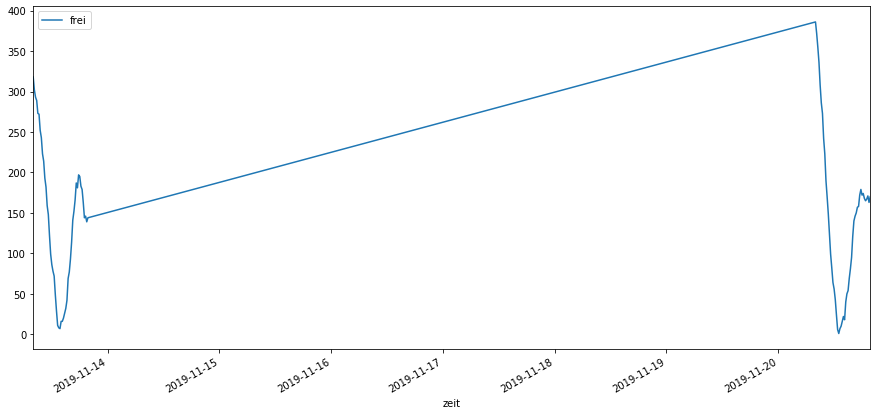

In [31]:
#Jelmoli am Montag
df_business[(df_business["name"] == "Parkhaus Urania") & (df_business.index.dayofweek == 2)].plot(figsize=(15,7))

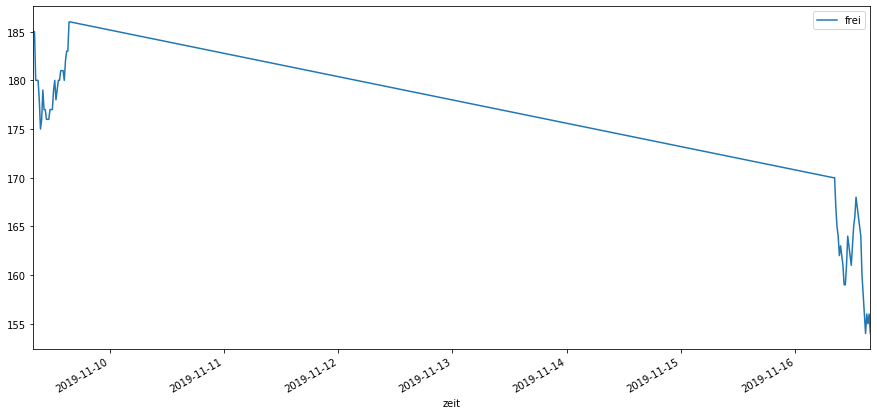

In [32]:
#Opéra am Montag
df_business[(df_business["name"] == "Parkhaus Stampfenbach") & (df_business.index.dayofweek == 5)].plot(figsize=(15,7))

### Hier nun die pivotierte Tabelle für Zeitverläufe

In [33]:
df_business = df_business.reset_index()
df_business["city"] = df_business["name"].isin(city)
df_business["kompromiss"] = df_business["name"].isin(kompromiss)
df_business

,zeit,name,frei,city,kompromiss
0,2019-11-18 13:45:00,Parkgarage am Central,28.0,True,True
1,2019-11-18 13:45:00,Parkhaus Accu,131.0,False,False
2,2019-11-18 13:45:00,Parkhaus Albisriederplatz,58.0,False,False
3,2019-11-18 13:45:00,Parkhaus Bleicherweg,20.0,False,True
4,2019-11-18 13:45:00,Parkhaus Center Eleven,131.0,False,False
...,...,...,...,...,...
19956,2019-11-20 17:00:00,Parkhaus Zürichhorn,31.0,False,False
19957,2019-11-20 17:00:00,Parkplatz Eisfeld,280.0,False,False
19958,2019-11-20 17:00:00,Parkplatz Theater 11,117.0,False,False
19959,2019-11-20 17:00:00,Parkplatz USZ Süd,7.0,False,True


In [34]:
df_city = df_business[df_business["city"] == True]
df_kompromiss = df_business[df_business["kompromiss"] == True]

In [36]:
df_pivot = df_city.pivot(index="zeit", columns='name', values='frei')
df_pivot

name,Parkgarage am Central,Parkhaus City Parking,Parkhaus Globus,Parkhaus Hohe Promenade,Parkhaus Jelmoli,Parkhaus Opéra,Parkhaus Talgarten,Parkhaus Urania
zeit,,,,,,,,
2019-11-07 12:15:00,19.0,234.0,0.0,272.0,0.0,53.0,0.0,20.0
2019-11-07 12:30:00,14.0,225.0,1.0,271.0,0.0,43.0,0.0,6.0
2019-11-07 12:45:00,10.0,218.0,0.0,264.0,0.0,41.0,0.0,3.0
2019-11-07 13:00:00,10.0,191.0,2.0,257.0,0.0,35.0,0.0,0.0
2019-11-07 13:15:00,10.0,182.0,2.0,261.0,0.0,26.0,0.0,4.0
...,...,...,...,...,...,...,...,...
2019-11-21 12:00:00,23.0,208.0,0.0,271.0,0.0,0.0,0.0,31.0
2019-11-21 12:15:00,23.0,199.0,0.0,265.0,0.0,8.0,0.0,13.0
2019-11-21 12:30:00,23.0,187.0,0.0,257.0,0.0,0.0,0.0,1.0


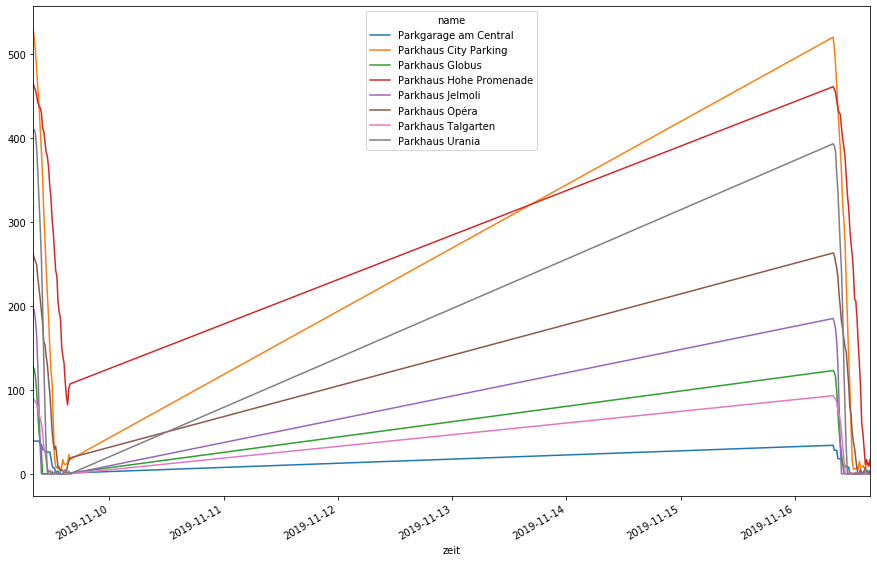

In [37]:
#Samstag in der City
df_pivot[df_pivot.index.dayofweek == 5].plot(figsize=(15,10))

name,Parkgarage am Central,Parkhaus City Parking,Parkhaus Globus,Parkhaus Hohe Promenade,Parkhaus Jelmoli,Parkhaus Opéra,Parkhaus Talgarten,Parkhaus Urania
zeit,,,,,,,,
2019-11-07 12:15:00,19.0,234.0,0.0,272.0,0.0,53.0,0.0,20.0
2019-11-07 12:30:00,14.0,225.0,1.0,271.0,0.0,43.0,0.0,6.0
2019-11-07 12:45:00,10.0,218.0,0.0,264.0,0.0,41.0,0.0,3.0
2019-11-07 13:00:00,10.0,191.0,2.0,257.0,0.0,35.0,0.0,0.0
2019-11-07 13:15:00,10.0,182.0,2.0,261.0,0.0,26.0,0.0,4.0
...,...,...,...,...,...,...,...,...
2019-11-21 12:00:00,23.0,208.0,0.0,271.0,0.0,0.0,0.0,31.0
2019-11-21 12:15:00,23.0,199.0,0.0,265.0,0.0,8.0,0.0,13.0
2019-11-21 12:30:00,23.0,187.0,0.0,257.0,0.0,0.0,0.0,1.0


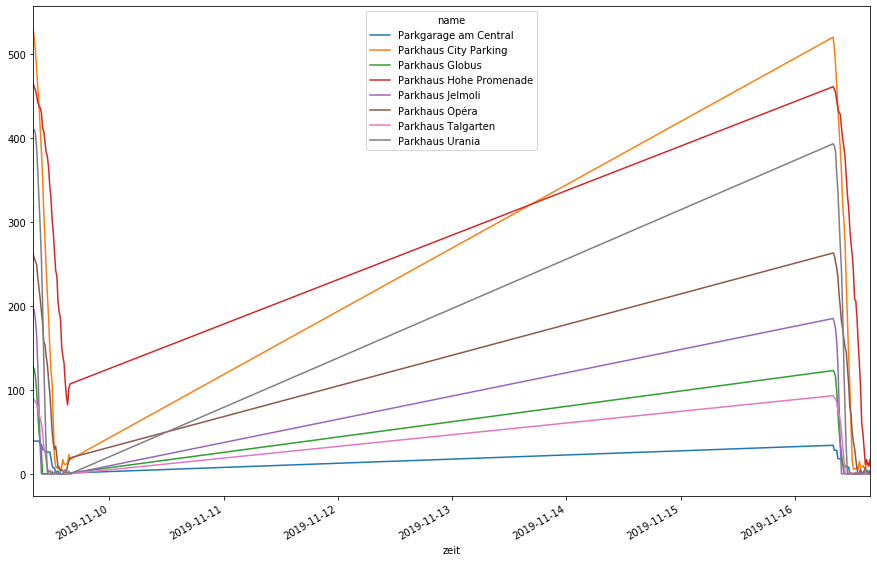

In [38]:
df_pivot[df_pivot.index.dayofweek == 5].plot(figsize=(15,10))
df_pivot

In [39]:
df_pivot['day'] = df_pivot.index.dayofweek
df_pivot['time'] = df_pivot.index.time

In [40]:
df_means = df_pivot.groupby(['day', 'time']).mean().reset_index()
df_means

name,day,time,Parkgarage am Central,Parkhaus City Parking,Parkhaus Globus,Parkhaus Hohe Promenade,Parkhaus Jelmoli,Parkhaus Opéra,Parkhaus Talgarten,Parkhaus Urania
0,0,08:00:00,39.0,518.5,123.5,422.5,140.5,251.5,56.5,386.5
1,0,08:15:00,36.5,502.5,117.5,410.0,141.5,247.5,46.0,381.0
2,0,08:30:00,31.5,486.0,115.5,405.0,133.5,241.0,38.0,370.5
3,0,08:45:00,31.5,463.5,111.0,397.0,126.0,235.0,34.0,357.0
4,0,09:00:00,31.5,440.5,104.0,387.0,118.0,221.5,25.0,345.0
...,...,...,...,...,...,...,...,...,...,...
267,5,14:45:00,1.5,8.5,0.0,60.0,0.0,4.5,0.0,5.0
268,5,15:00:00,1.5,12.0,0.0,54.5,0.0,2.0,0.5,1.5
269,5,15:15:00,2.0,13.0,0.0,47.0,0.0,5.0,0.0,1.0
270,5,15:30:00,0.5,17.0,0.0,55.0,0.0,7.5,0.0,1.5


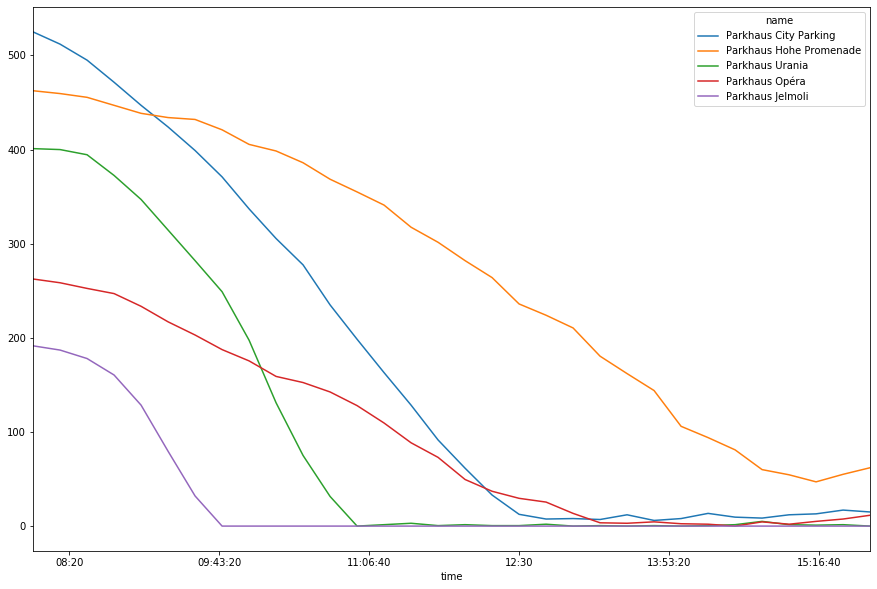

In [41]:
df_means[df_means["day"] == 5][["Parkhaus City Parking", "Parkhaus Hohe Promenade","Parkhaus Urania", "Parkhaus Opéra", "Parkhaus Jelmoli", "time"]].plot(x = "time", figsize=(15,10))

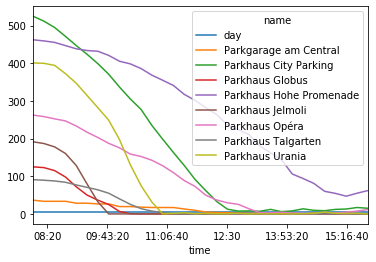

In [48]:
df_means[df_means["day"] == 5].plot(x = "time")

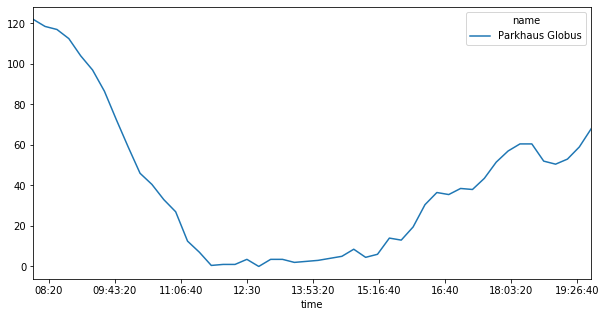

In [49]:
#Jelmoli am Montag
df_means[df_means["day"] == 2][["Parkhaus Globus", "time"]].plot(x = "time", figsize=(10,5))

In [43]:
df_jelmoli = df_means[df_means["day"] == 2][["Parkhaus Jelmoli", "time"]]
df_jelmoli.to_csv("jelmoli.csv")

In [44]:
df_mehrere = df_means[df_means["day"] == 2][["Parkhaus Jelmoli", "Parkhaus City Parking", "Parkhaus Opéra", "Parkhaus Hohe Promenade", "Parkhaus Hauptbahnhof", "time"]]
df_mehrere.to_csv("mehrere.csv")

KeyError: "['Parkhaus Hauptbahnhof'] not in index"

In [45]:
df_means[df_means["day"] == 5].to_csv("city_samstag.csv")

In [ ]:
df_means[df_means["Parkhaus Urania"] == 0]

In [ ]:
df_pivot[df_pivot["Parkhaus City Parking"] == 0]